## Visualising with scripts

### Import

In [3]:
from sentinelhub import WmsRequest, WcsRequest, SHConfig, MimeType, SentinelHubRequest, SentinelHubDownloadClient, DataCollection, DownloadRequest, CRS, BBox, SHConfig, Geometry
from utils import plot_image

### Check credentials

In [4]:
config = SHConfig()

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret.")

### Send API request

In [5]:
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B08", "B04", "B02"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B08, 2.5 * sample.B04, 2.5 * sample.B02];
}
"""
bbox = BBox(bbox=[-5.32013, 51.72001, -5.25804, 51.751902], crs=CRS.WGS84)

request = SentinelHubRequest(
  evalscript=evalscript,
  input_data=[
    SentinelHubRequest.input_data(
    data_collection=DataCollection.SENTINEL2_L2A,
    time_interval=('2021-07-28', '2021-07-28'),    
)
  ],
  responses=[
    SentinelHubRequest.output_response('default', MimeType.PNG),
    
  ],
  bbox=bbox,  
  size=[512, 424.507],
  config=config
)
infra_red_response = request.get_data() 

### Visualise the result

The False color infrared composite maps near-infrared spectral band B8 with red and green bands, B4 and B3, to sRGB components directly. It is most commonly used to assess plant density and health, as plants reflect near infrared and green light, while absorbing red. Since they reflect more near infrared than green, plant-covered land appears deep red. Denser plant growth is darker red. Cities and exposed ground are gray or tan, and water appears blue or black.

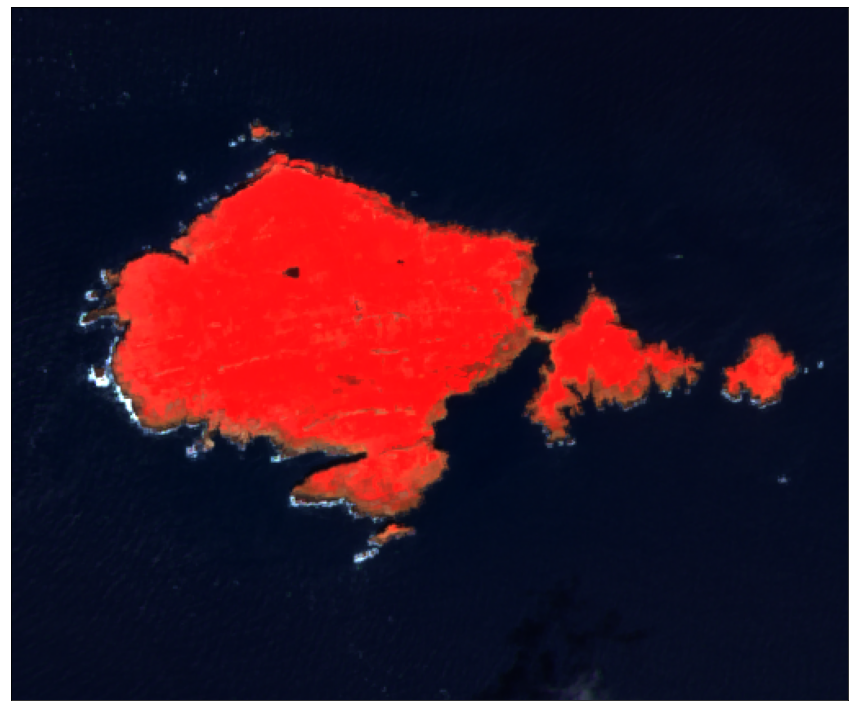

In [6]:
infra_red_img = infra_red_response[0]
plot_image(infra_red_img, factor=1/255, clip_range=(0, 1))

### True colour

In [7]:
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B04", "B03", "B02"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""
bbox = BBox(bbox=[-5.32013, 51.72001, -5.25804, 51.751902], crs=CRS.WGS84)

request = SentinelHubRequest(
  evalscript=evalscript,
  input_data=[
    SentinelHubRequest.input_data(
    data_collection=DataCollection.SENTINEL2_L2A,
    time_interval=('2021-07-28', '2021-07-28'),    
)
  ],
  responses=[
    SentinelHubRequest.output_response('default', MimeType.PNG),
    
  ],
  bbox=bbox,  
  size=[512, 424.507],
  config=config
)
true_colour_response = request.get_data() 

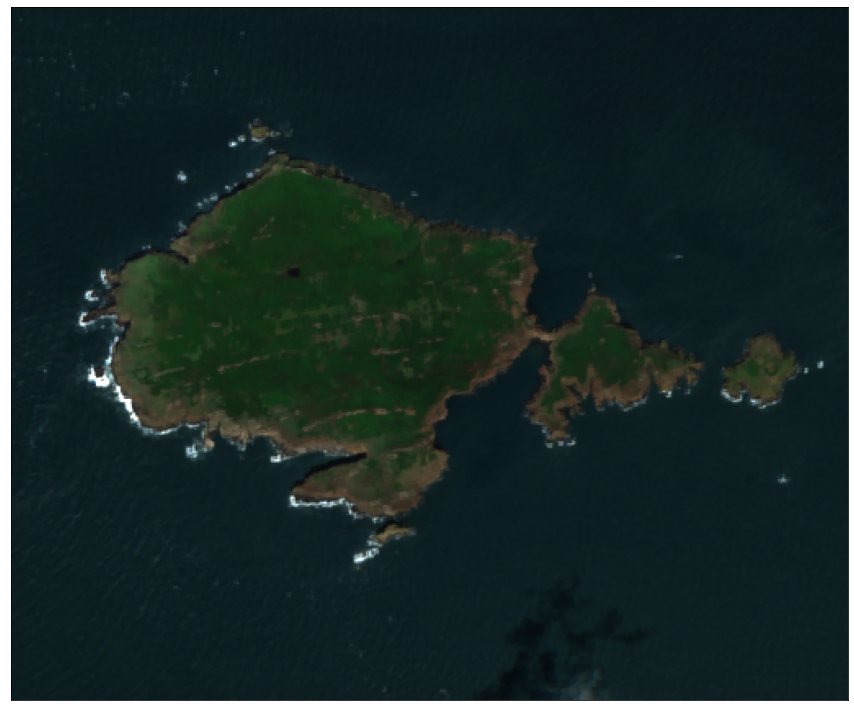

In [8]:
true_colour_img = true_colour_response[0]
plot_image(true_colour_img, factor=1/255, clip_range=(0, 1))

### City Highlights script
Besides the 3 basic targets such as Rooftops, Vegetation and Water, it is possible to view the following in the results:

urban areas with rooftops and buildings in red
high probability of vegetation areas in green
rivers, pools and the sea in blue

In [12]:
from sentinelhub import SentinelHubRequest, SentinelHubDownloadClient, DataCollection, MimeType, DownloadRequest, CRS, BBox, SHConfig, Geometry

#Credentials

config = SHConfig()

onfig = SHConfig()

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret.")

evalscript = """
// detection of vegetation
NDVI_RedEdge = (B08 - B05)/(B08 + B05)
threshold_vegetation = 0.45
Vegetation = NDVI_RedEdge > threshold_vegetation

// ceramic rooftop detection
RATIO_Red = B04/[B01+B02+B03+B04+B05+B06+B07]
NDBI = (B11 - B08)/(B11 + B08)
threshold_rooftop = 0.14
Rooftop = (RATIO_Red > threshold_rooftop) && (NDBI > threshold_rooftop)

// water detection
NDWI = (B03 - B08)/(B03 + B08)
threshold_water = 0.2
Water = NDWI > threshold_water

// gain to obtain smooth visualization
gain = 0.7
return [gain*Rooftop, gain*Vegetation, gain*Water]
"""
bbox = BBox(bbox=[139.721336, 35.554574, 139.990277, 35.724218], crs=CRS.WGS84)

request = SentinelHubRequest(
  evalscript=evalscript,
  input_data=[
    SentinelHubRequest.input_data(
    data_collection=DataCollection.SENTINEL2_L1C,
    time_interval=('2021-08-01', '2021-09-01'),    
)
  ],
  responses=[
    SentinelHubRequest.output_response('default', MimeType.PNG),
    
  ],
  bbox=bbox,  
  size=[1068.872, 828.737],
  config=config
)
city_highlights_response = request.get_data() 

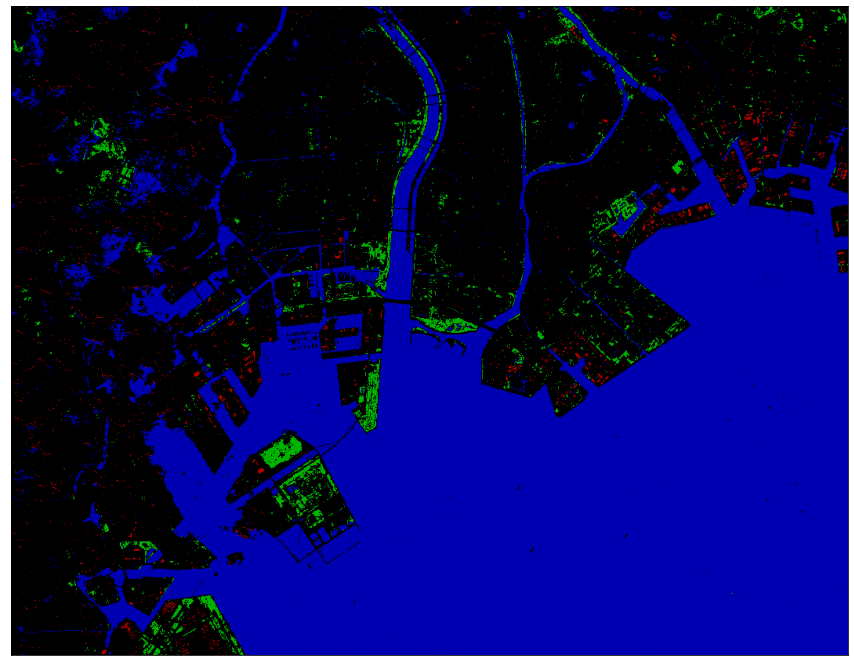

In [14]:
city_highlights_img = city_highlights_response[0]
plot_image(city_highlights_img, factor=1/255, clip_range=(0, 1))